# Collatz 
- Code By Michael Sherif Naguib
- license: MIT open source
- Date: 5/15/19
- @University of Tulsa
- Description: Updating Old Code with new techniques! 

In [1]:
%matplotlib notebook
#imports
from NumLib import PlotUtil # see https://github.com/Michael-Naguib/NumLib       (side note: this has A LOT of big imports... be patient)
import numpy as np
import random
import math
import sys
import tqdm

C:\Users\socce\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\socce\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
#Stores the memoized values for memoized_collatz(n)
#NOTE! AS these values are saved between runs... if there is an error in the functions
#      which place values in these... it may cause an improper value to be stored...
collatz_cache={}
collatz_sequences_cache={1:[1]}
collatz_sequence_length_cache={1:1,0:0}

In [3]:
#Collatz function:
def collatz(n):
    r=n/2# more efficient than % edge case 0
    if r==n//2:
        return r
    else:
        return 3*n + 1

#Memoizes Collatz values computation:
def memoized_collatz(n):
    if n in collatz_cache:
        return collatz_cache[n]
    else:
        result = collatz(n)
        collatz_cache[n]=result
        return result

In [4]:
#WARNING! although these memoized versions have a benifit by not having to do as many computations
#         if the path length is unique and exceeds python's max recursive depth they will error...

#The Collatz sequence progression from n --> 1 (inclusive of each): returns the sequence as a list
def collatz_sequence(n):
    all_nums = [n]   
    while(num != 1):
        num = memoized_collatz(num)
        all_nums.append(num)
    return all_nums

#Memoizes Sequences .... sequence progression from n --> 1 (inclusive of each): returns the sequence as a list
def memoized_collatz_sequence(n):
    if n in collatz_sequences_cache:
        return collatz_sequences_cache[n]
    else:
        all_nums=[n]
        all_nums = all_nums + memoized_collatz_sequence(memoized_collatz(n))
        return all_nums
    
#Memoizes the sequence Length ... more memory efficient.... 
def memoized_collatz_sequence_length(n):
    if n in collatz_sequence_length_cache:
        return collatz_sequence_length_cache[n]
    else:
        result = 1+ memoized_collatz_sequence_length(memoized_collatz(n))
        collatz_sequence_length_cache[n] = result
        return result

In [13]:
#Settings
NUM_OF_POINTS=int(math.pow(10,5))

#Create the x axis values
x = np.array(list(range(NUM_OF_POINTS)))

#What this does: maps a range same as the x axis to its path length then converts to a numpy array... tqdm logs progress...
y = np.array(list(map(lambda x : memoized_collatz_sequence_length(x),tqdm.tqdm(range(NUM_OF_POINTS)))))



100%|█████████████████████████████| 100000/100000 [00:00<00:00, 1271405.75it/s]


<IPython.core.display.Javascript object>


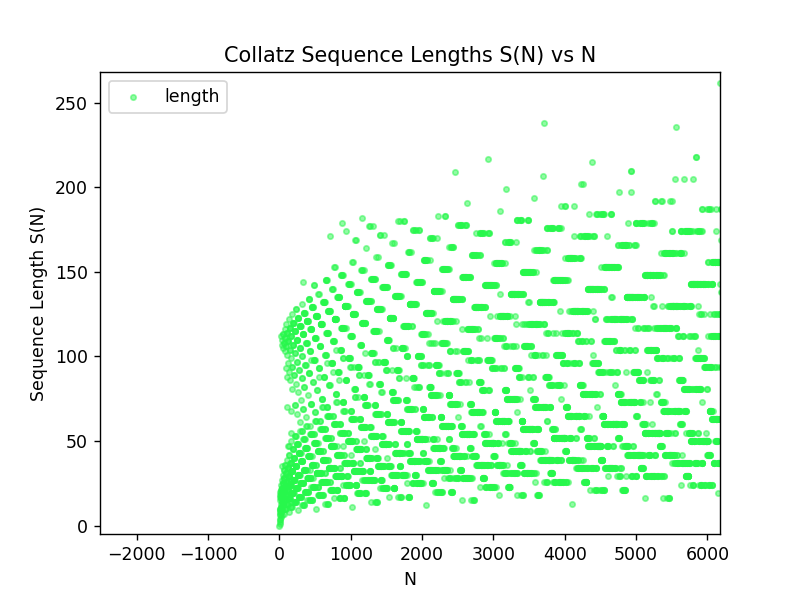

In [15]:
#Plot the data

#pu = PlotUtil.PlotUtil([x,y])
#pu.interactive_plot()
PlotUtil.PlotUtil.plot({'data':[x,y],"name":"length"},x_name="N", y_name="Sequence Length S(N)",title="Collatz Sequence Lengths S(N) vs N")